# Getting predicions

This notebook load and use the models

## Importing the libraries

In [1]:
from NF import NF
from NNgauss import NNgauss
import pandas as pd
import matplotlib.pyplot as plt

/Users/natalidesanti/env_pytorch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


GPU is not available. Using CPU instead.


## Loading data

In [2]:
dataset = pd.read_csv('data/subtest_tng300.csv')

In [3]:
dataset.head()

,ID,X_h,Y_h,Z_h,M_h,C_h,S_h,z_h,Delta3_h,x_g,y_g,z_g,smass,color,radius,sSFR
0,148942.0,37.155465,83.731352,156.890562,11.230634,0.949239,0.102213,0.909091,9.760820,37.155464,83.731354,156.890564,9.020804,0.441576,0.428343,-9.636042
1,143805.0,62.748066,184.040500,188.505172,11.193012,0.978603,0.057343,1.333333,1.123779,62.748066,184.040497,188.505173,8.825384,0.075232,0.266293,-9.731375
2,37609.0,191.439203,117.276422,130.288531,11.963388,1.061022,0.012275,1.575758,2.584691,191.439209,117.276421,130.288528,10.391277,1.130091,0.482415,-12.301883
3,48567.0,76.807563,143.693719,179.001844,11.788298,1.047671,0.069209,1.818182,0.915077,76.807564,143.693726,179.001846,10.166031,0.910177,0.774072,-11.408447
4,92208.0,177.415203,11.204672,30.818141,11.464064,1.117278,0.067701,2.242424,1.284318,177.415207,11.204672,30.818140,9.647124,1.016806,0.679863,-10.740095


## Selecting data

In [4]:
# Properties
target_props = ['smass', 'color', 'sSFR', 'radius']
input_props = ['M_h', 'C_h', 'S_h', 'z_h', 'Delta3_h']

input_data = dataset[input_props].to_numpy()

## Loading the models

The output shape is `(n_samples, n_simulations, n_dimensions)`


In [5]:
nngauss = NNgauss(target_props, trial = 45)
nf = NF(target_props, trial = 99)

## Getting the predictions

In [6]:
nngauss_pred = nngauss.get_sample(input_data, n_samples = 10)

ValueError: Exception encountered when calling layer 'distribution_lambda' (type DistributionLambda).

A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


Call arguments received by layer 'distribution_lambda' (type DistributionLambda):
  • inputs=<KerasTensor shape=(None, 14), dtype=float32, sparse=False, name=keras_tensor_6>
  • args=<class 'inspect._empty'>
  • kwargs={'training': 'None'}

In [17]:
nf_pred = nf.get_sample(input_data, n_samples = 10)

# instance: 0


/Users/natalidesanti/env_pytorch/lib/python3.11/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.2.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [8]:
nf_pred.shape#, nngauss_pred.shape

(10, 10, 4)

## Linear comparison

### Stellar Mass

Text(0.5, 0, 'True')

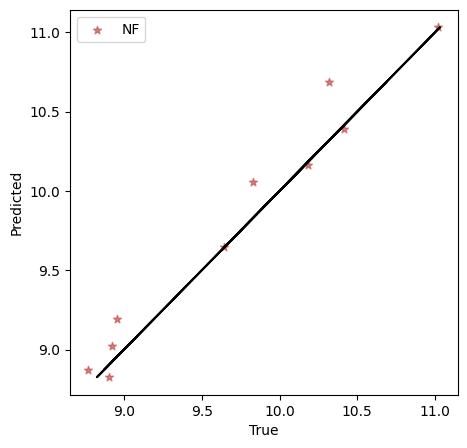

In [18]:
nf_smass = nf_pred[0, :, 0]
#nngauss_smass = nngauss_pred[0, :, 0]

plt.figure(dpi = 100, figsize = (5, 5))

plt.plot(dataset['smass'], dataset['smass'], color = 'black')

# plt.scatter(nngauss_smass, dataset['smass'],
#             color = nngauss.color, label = nngauss.label, marker = nngauss.marker,
#             alpha = 0.5)

plt.scatter(nf_smass, dataset['smass'],
            color = nf.color, label = nf.label, marker = nf.marker,
            alpha = 0.5)

plt.legend()
plt.ylabel('Predicted')
plt.xlabel('True')